<h1 style="text-align:center">Coffee Sales</h1>

# Library Imports and Style Configuration

In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import catppuccin
plt.style.use(catppuccin.PALETTE.latte.identifier)
%matplotlib inline

# Data Loading

In [2]:
df = pd.read_csv("index.csv")

# Data Exploration

In [3]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.shape

(1133, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
df["datetime"] = pd.to_datetime(df["datetime"])

## Number of Total Dataset Records

In [7]:
start_date = df["datetime"].iloc[0]
end_date = df["datetime"].iloc[-1]
total_days = (end_date - start_date).days

print(f"The dataset spans {total_days} days of sales data (from {start_date.date()} to {end_date.date()}).")

The dataset spans 152 days of sales data (from 2024-03-01 to 2024-07-31).


## Total Money Earned (2024-03-01 to 2024-07-31)

In [8]:
print(f"Total money earned {int(df.money.sum()):,} USD")

Total money earned 37,508 USD


# Payment Type Distribution

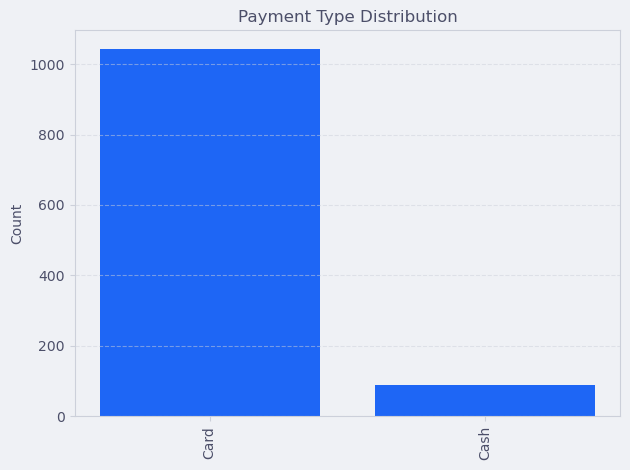

In [9]:
plt.bar([x.capitalize() for x in df["cash_type"].value_counts().index], df["cash_type"].value_counts())
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Payment Type Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Coffee Name Distribution

In [10]:
def coffee_dist(sort_type: str = "value", ascending: bool = True):
    counts = df["coffee_name"].value_counts()
    if sort_type == "index":
        counts = counts.sort_index(ascending=ascending)
    elif sort_type == "value":
        counts = counts.sort_values(ascending=ascending)
    else:
        raise ValueError("sort_type must be 'index' or 'value'")
    plt.bar(counts.index, counts.values)
    plt.xticks(rotation=90)
    plt.ylabel("No. of Coffee Order")
    plt.title("Coffee Distribution")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

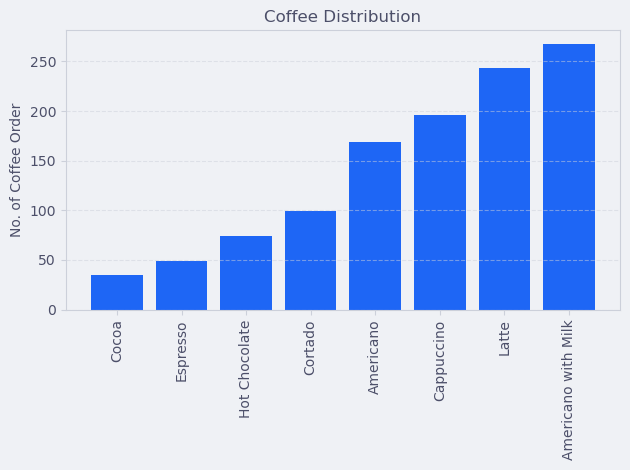

In [11]:
coffee_dist(sort_type="value")

# Sales Per Coffee

In [12]:
def sales_dist_per_coffee(sort_type: str = "value", ascending: bool = True):
    sales_per_coffee = df.groupby("coffee_name")["money"].sum()
    if sort_type == "index":
        sales_per_coffee = sales_per_coffee.sort_index(ascending=ascending)
    elif sort_type == "value":
        sales_per_coffee = sales_per_coffee.sort_values(ascending=ascending)
    else:
        raise ValueError("sort_type must be 'index' or 'value'")
    plt.bar(sales_per_coffee.index, sales_per_coffee.values)
    plt.xticks(rotation=90)
    plt.ylabel("Price (USD)")
    plt.title("Sales Per Coffee")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

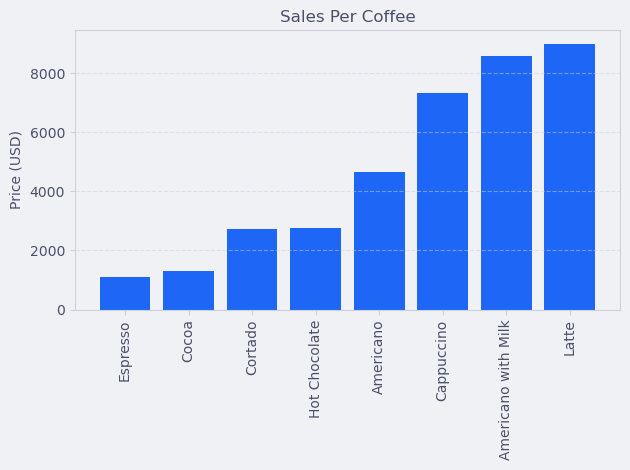

In [13]:
sales_dist_per_coffee(sort_type="value")


# Coffee Sales Per Month

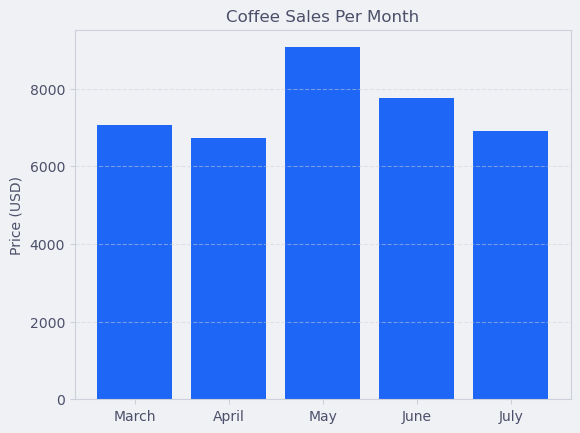

In [14]:
months = [pd.Timestamp(x).strftime("%B") for x in df.set_index(df["datetime"]).groupby(pd.Grouper(freq="ME"))["money"].sum().index]
sale_per_month = df.set_index(df["datetime"]).groupby(pd.Grouper(freq="ME"))["money"].sum()
plt.bar(months, sale_per_month)
plt.ylabel("Price (USD)")
plt.title("Coffee Sales Per Month")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Monthly Sales Comparison by Coffee Type

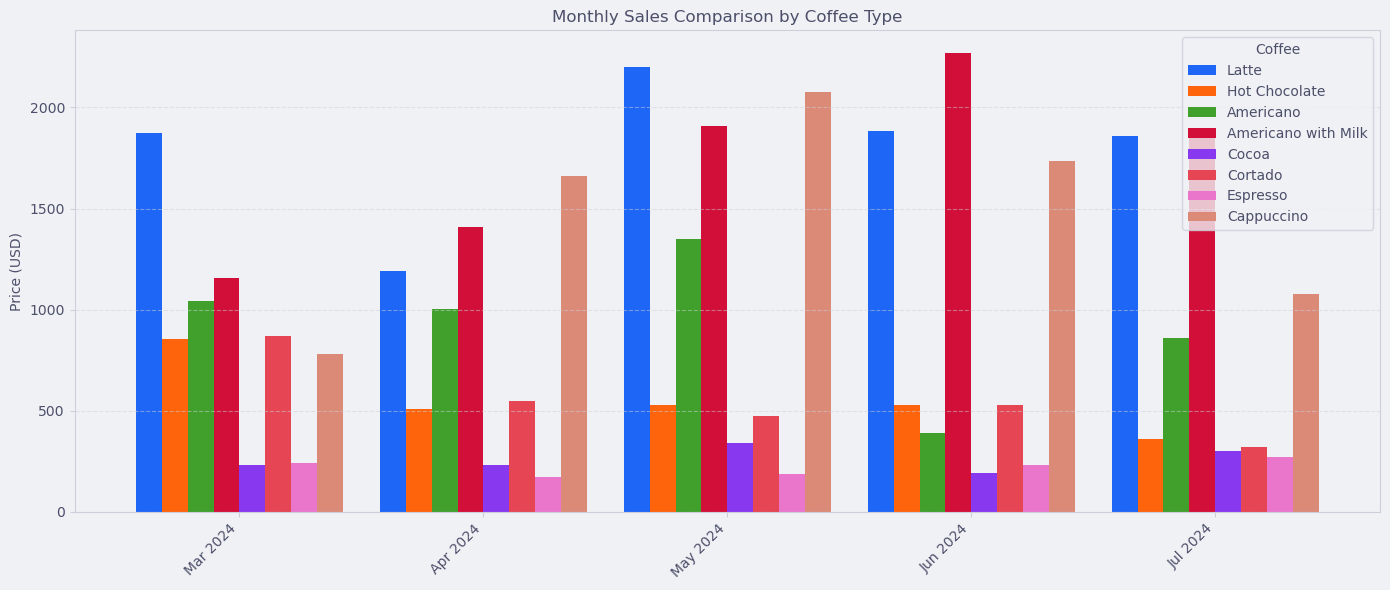

In [15]:
def sales_comparison_bar_plot(coffee_list):
    monthly_sales = pd.DataFrame()

    for coffee in coffee_list:
        sales = (
            df[df["coffee_name"] == coffee]
            .set_index("datetime")
            .groupby(pd.Grouper(freq="ME"))["money"]
            .sum()
            .rename(coffee)
        )
        monthly_sales = pd.concat([monthly_sales, sales], axis=1)

    # Fill missing values to avoid plotting issues
    monthly_sales.fillna(0, inplace=True)

    # Convert index to string format for plotting
    monthly_sales.index = pd.to_datetime(monthly_sales.index).strftime("%b %Y")

    # Plot the bar chart
    monthly_sales.plot(kind="bar", figsize=(14, 6), width=0.85)

    plt.title("Monthly Sales Comparison by Coffee Type")
    plt.ylabel("Price (USD)")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Coffee")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# Usage
coffee_types = [
    "Latte", "Hot Chocolate", "Americano", "Americano with Milk",
    "Cocoa", "Cortado", "Espresso", "Cappuccino"
]

sales_comparison_bar_plot(coffee_types)

# Weekly Sales: Weekday vs Weekend

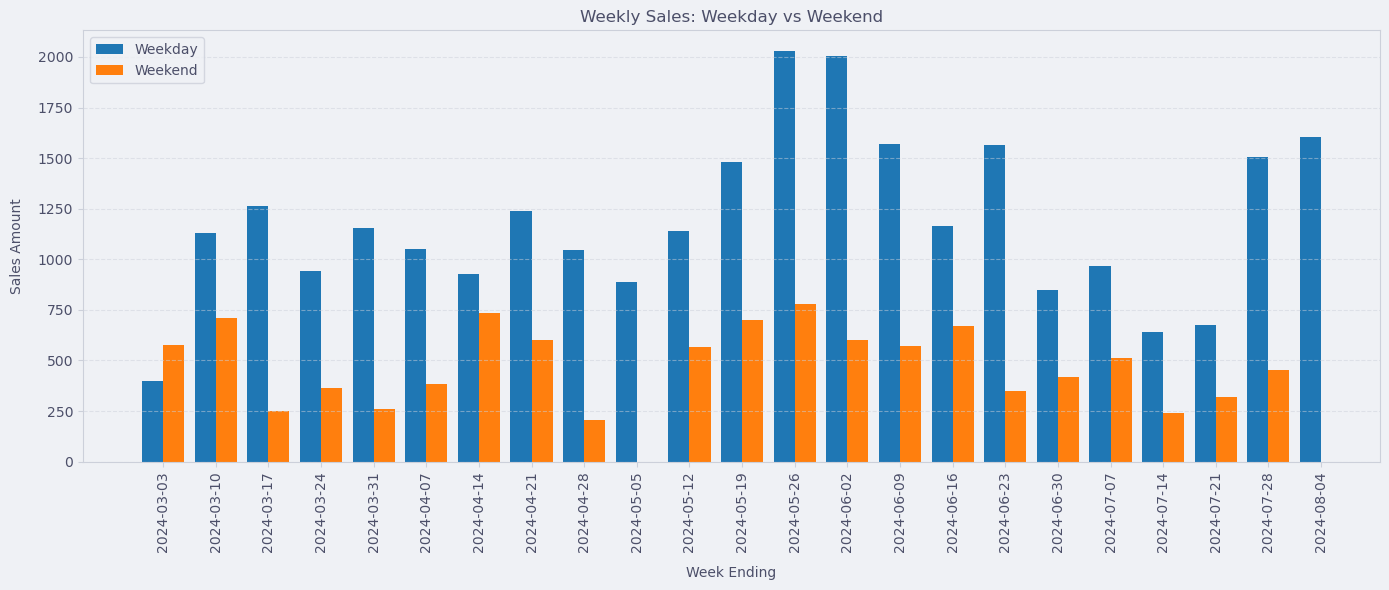

In [16]:
df_weekday = df[df["datetime"].dt.weekday < 5]
df_weekend = df[df["datetime"].dt.weekday >= 5]

# Weekly aggregation
weekday_sales = df_weekday.set_index("datetime").resample("W")["money"].sum()
weekend_sales = df_weekend.set_index("datetime").resample("W")["money"].sum()

# Combine into one DataFrame
weekly_sales = pd.DataFrame({
    "Weekday": weekday_sales,
    "Weekend": weekend_sales
})

# Plot: side-by-side bars per week
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.4
x = range(len(weekly_sales))

# Plot bars
ax.bar([i - bar_width/2 for i in x], weekly_sales["Weekday"], width=bar_width, label="Weekday", color="#1f77b4")
ax.bar([i + bar_width/2 for i in x], weekly_sales["Weekend"], width=bar_width, label="Weekend", color="#ff7f0e")

# X-axis labels with week ending
ax.set_xticks(x)
ax.set_xticklabels([d.strftime("%Y-%m-%d") for d in weekly_sales.index], rotation=45)
plt.xticks(rotation=90)

# Titles and labels
ax.set_title("Weekly Sales: Weekday vs Weekend")
ax.set_xlabel("Week Ending", labelpad=10)
ax.set_ylabel("Sales Amount", labelpad=10)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()